In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.cm import get_cmap

# Create a sequential colormap
cmap = get_cmap('Spectral')  # You can choose any sequential colormap here

plt.rcParams['figure.facecolor'] = 'w'

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

# plt.rcParams["font.size"] = 15
# plt.rcParams["figure.figsize"] = 11,9

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_24213/1027519216.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Spectral')  # You can choose any sequential colormap here


In [29]:
colnames=['event_id', 'x', 'y', 'z', "kin_energy", "mode", "prevol", "postvol"] 
cathode_events = pd.read_csv("../data/photoelectric/photoelectric_merged.txt", delimiter=", ", names=colnames)

cathode_events['prevol'] = cathode_events['prevol'].replace('GAS', 'ACTIVE')
display(cathode_events)

print(cathode_events.prevol.unique())

tot_vis = len(cathode_events[cathode_events.kin_energy < 5])
tot_vuv = len(cathode_events[cathode_events.kin_energy > 5])
tot = len(cathode_events)

print("Total:", tot)
print("Total Visible:", tot_vis, "(", round(100*tot_vis/tot,2), "%)")
print("Total VUV:", tot_vuv, "(", round(100*tot_vuv/tot,2), "%)")

parts = pd.read_hdf("../data/photoelectric/photoelectric_merged.h5", "MC/particles")
# parts = parts[parts.primary == 1]
# parts = parts[(parts.initial_x > -500) & (parts.initial_x < 500) & (parts.initial_y > -500) & (parts.initial_y < 500)] # skim off events just outside the bin range
print("Total Sample:", len(parts))
# parts = parts[["event_id", "initial_x", "initial_y"]]
display(parts)

cathode_events = cathode_events[cathode_events.event_id.isin(parts.event_id.unique())] # remove the events that were removed in the particle table
parts_common = parts[parts.event_id.isin(cathode_events.event_id.unique())]

cathode_events = pd.merge(cathode_events, parts_common, on="event_id", how = "inner")

display(cathode_events)

print(len(cathode_events.event_id.unique()))
print("Tot absorbed: ", len(cathode_events[cathode_events["mode"] == "Absorption"]))
print("Tot reflected: ", len(cathode_events[cathode_events["mode"] == "Reflection"]))
print("Tot other: ", len(cathode_events[cathode_events["mode"] == "Other"]))



/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_24213/2296698010.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  cathode_events = pd.read_csv("../data/photoelectric/photoelectric_merged.txt", delimiter=", ", names=colnames)


,event_id,x,y,z,kin_energy,mode,prevol,postvol
0,1000046,344.64200,208.3420,1187.43,2.99129,Absorption,MESH_HOLE_GAS,CATHODE_GRID
1,1000049,-62.16860,491.0060,1187.37,3.02151,Reflection,ACTIVE,CATHODE_GRID
2,1000049,-62.15930,493.6780,1187.37,3.02151,Absorption,VESSEL_GAS,CATHODE_GRID
3,1000119,-459.23800,56.2569,1187.50,2.96297,Absorption,BUFFER,CATHODE_GRID
4,1000121,339.55300,-88.9062,1187.39,2.97770,Reflection,MESH_HOLE_GAS,CATHODE_GRID
...,...,...,...,...,...,...,...,...
4158655,99999909,-223.68100,-115.1840,1187.45,2.95845,Absorption,MESH_HOLE_GAS,CATHODE_GRID
4158656,99999913,174.50700,338.5270,1187.50,3.04393,Reflection,BUFFER,CATHODE_GRID
4158657,99999950,-104.20200,399.0790,1187.37,2.75683,Absorption,ACTIVE,CATHODE_GRID
4158658,99999975,2.53043,98.1733,1187.37,3.06511,Absorption,ACTIVE,CATHODE_GRID


['MESH_HOLE_GAS' 'ACTIVE' 'VESSEL_GAS' 'BUFFER']
Total: 4158660
Total Visible: 3686614 ( 88.65 %)
Total VUV: 472046 ( 11.35 %)
Total Sample: 99951524


,event_id,initial_x,initial_y
0,1000000,49.375000,423.50000
2,1000001,230.375000,98.50000
3,1000002,-275.500000,315.00000
5,1000003,-262.250000,-74.56250
6,1000004,15.226562,245.25000
...,...,...,...
1433065,99999995,-42.343750,269.50000
1433067,99999996,-356.500000,-199.62500
1433070,99999997,-224.500000,33.90625
1433071,99999998,98.312500,-157.75000


,event_id,x,y,z,kin_energy,mode,prevol,postvol,initial_x,initial_y
0,1000046,344.64200,208.3420,1187.43,2.99129,Absorption,MESH_HOLE_GAS,CATHODE_GRID,213.125000,-276.2500
1,1000049,-62.16860,491.0060,1187.37,3.02151,Reflection,ACTIVE,CATHODE_GRID,408.000000,-239.8750
2,1000049,-62.15930,493.6780,1187.37,3.02151,Absorption,VESSEL_GAS,CATHODE_GRID,408.000000,-239.8750
3,1000119,-459.23800,56.2569,1187.50,2.96297,Absorption,BUFFER,CATHODE_GRID,313.750000,-282.2500
4,1000121,339.55300,-88.9062,1187.39,2.97770,Reflection,MESH_HOLE_GAS,CATHODE_GRID,48.156250,435.2500
...,...,...,...,...,...,...,...,...,...,...
4157997,99999909,-223.68100,-115.1840,1187.45,2.95845,Absorption,MESH_HOLE_GAS,CATHODE_GRID,-28.921875,116.9375
4157998,99999913,174.50700,338.5270,1187.50,3.04393,Reflection,BUFFER,CATHODE_GRID,-120.937500,39.0625
4157999,99999950,-104.20200,399.0790,1187.37,2.75683,Absorption,ACTIVE,CATHODE_GRID,-94.000000,359.7500
4158000,99999975,2.53043,98.1733,1187.37,3.06511,Absorption,ACTIVE,CATHODE_GRID,86.250000,-42.8125


3697245
Tot absorbed:  1986802
Tot reflected:  2171200
Tot other:  0


In [36]:
max(cathode_events['initial_y'])
max(cathode_events['initial_x'])


cathode_events["initial_x"] = cathode_events["initial_x"].astype(float)
cathode_events["initial_y"] = cathode_events["initial_y"].astype(float)

parts["initial_x"] = parts["initial_x"].astype(float)
parts["initial_y"] = parts["initial_y"].astype(float)


In [37]:
# Apply the detector binning to the positions
def ApplyBinning(df):

    nbins = 10

    # Define bin edges using np.linspace for x and y
    x_bins = np.linspace(-500, 500, nbins)  # 10 evenly spaced bins between -500 and 500
    y_bins = np.linspace(-500, 500, nbins)

    # Bin the x and y columns
    df['x_bin'] = pd.cut(df['initial_x'], bins=x_bins, labels=False)  # Labels as index (0, 1, 2,...)
    df['y_bin'] = pd.cut(df['initial_y'], bins=y_bins, labels=False)

    # Calculate bin centers
    x_bin_centers = (x_bins[:-1] + x_bins[1:]) / 2  # Bin centers for x
    y_bin_centers = (y_bins[:-1] + y_bins[1:]) / 2  # Bin centers for y

    # Assign the bin centers as new columns
    df['x_bin_center'] = df['x_bin'].map(lambda i: x_bin_centers[i] if pd.notna(i) else np.nan)
    df['y_bin_center'] = df['y_bin'].map(lambda i: y_bin_centers[i] if pd.notna(i) else np.nan)

    # Assign a unique bin ID for each (x_bin, y_bin) pair
    df['bin_id'] = df['x_bin'].astype(str) + '_' + df['y_bin'].astype(str)

    return df

cathode_events = ApplyBinning(cathode_events)
parts = ApplyBinning(parts)

display(cathode_events)
display(parts)

,event_id,x,y,z,kin_energy,mode,prevol,postvol,initial_x,initial_y,x_bin,y_bin,x_bin_center,y_bin_center,bin_id
0,1000046,344.64200,208.3420,1187.43,2.99129,Absorption,MESH_HOLE_GAS,CATHODE_GRID,213.125000,-276.2500,6,2,222.222222,-222.222222,6_2
1,1000049,-62.16860,491.0060,1187.37,3.02151,Reflection,ACTIVE,CATHODE_GRID,408.000000,-239.8750,8,2,444.444444,-222.222222,8_2
2,1000049,-62.15930,493.6780,1187.37,3.02151,Absorption,VESSEL_GAS,CATHODE_GRID,408.000000,-239.8750,8,2,444.444444,-222.222222,8_2
3,1000119,-459.23800,56.2569,1187.50,2.96297,Absorption,BUFFER,CATHODE_GRID,313.750000,-282.2500,7,1,333.333333,-333.333333,7_1
4,1000121,339.55300,-88.9062,1187.39,2.97770,Reflection,MESH_HOLE_GAS,CATHODE_GRID,48.156250,435.2500,4,8,0.000000,444.444444,4_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4157997,99999909,-223.68100,-115.1840,1187.45,2.95845,Absorption,MESH_HOLE_GAS,CATHODE_GRID,-28.921875,116.9375,4,5,0.000000,111.111111,4_5
4157998,99999913,174.50700,338.5270,1187.50,3.04393,Reflection,BUFFER,CATHODE_GRID,-120.937500,39.0625,3,4,-111.111111,0.000000,3_4
4157999,99999950,-104.20200,399.0790,1187.37,2.75683,Absorption,ACTIVE,CATHODE_GRID,-94.000000,359.7500,3,7,-111.111111,333.333333,3_7
4158000,99999975,2.53043,98.1733,1187.37,3.06511,Absorption,ACTIVE,CATHODE_GRID,86.250000,-42.8125,5,4,111.111111,0.000000,5_4


,event_id,initial_x,initial_y,x_bin,y_bin,x_bin_center,y_bin_center,bin_id
0,1000000,49.375000,423.50000,4,8,0.000000,444.444444,4_8
2,1000001,230.375000,98.50000,6,5,222.222222,111.111111,6_5
3,1000002,-275.500000,315.00000,2,7,-222.222222,333.333333,2_7
5,1000003,-262.250000,-74.56250,2,3,-222.222222,-111.111111,2_3
6,1000004,15.226562,245.25000,4,6,0.000000,222.222222,4_6
...,...,...,...,...,...,...,...,...
1433065,99999995,-42.343750,269.50000,4,6,0.000000,222.222222,4_6
1433067,99999996,-356.500000,-199.62500,1,2,-333.333333,-222.222222,1_2
1433070,99999997,-224.500000,33.90625,2,4,-222.222222,0.000000,2_4
1433071,99999998,98.312500,-157.75000,5,3,111.111111,-111.111111,5_3


In [38]:
# Get the total event counts in each bin
bin_counts = parts['bin_id'].value_counts().sort_index()
display(bin_counts)

bin_id
0_1      21850
0_2     682755
0_3    1284204
0_4    1481780
0_5    1322921
        ...   
8_3    1388155
8_4    1582993
8_5    1429996
8_6     880991
8_7      91431
Name: count, Length: 77, dtype: int64

[]

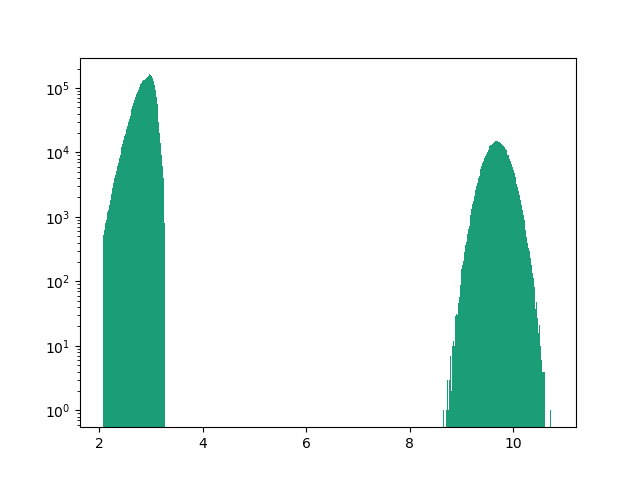

In [39]:
plt.figure()

plt.hist(cathode_events.kin_energy, bins = 500);
plt.semilogy()

Text(0, 0.5, 'Y [mm]')

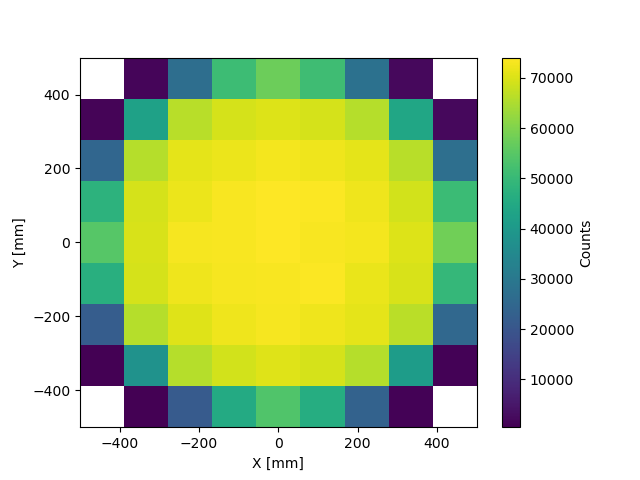

In [41]:
fig, ax = plt.subplots()
# plt.hist2d(cathode_events.initial_x, cathode_events.initial_y, bins = [np.linspace(-500,500, 10), np.linspace(-500,500, 10)]);
# plt.hist2d(parts.initial_x, parts.initial_y, bins = [np.linspace(-500,500, 10), np.linspace(-500,500, 10)]);


hist, xedges, yedges = np.histogram2d(cathode_events.initial_x, cathode_events.initial_y, bins = [np.linspace(-500,500, 10), np.linspace(-500,500, 10)])
# hist, xedges, yedges = np.histogram2d(parts.initial_x, parts.initial_y, bins = [np.linspace(-500,500, 10), np.linspace(-500,500, 10)])

# 2. Mask zero bins
masked_hist = np.ma.masked_where(hist == 0, hist)  # Mask bins where the count is zero

# 3. Create a custom colormap with white for the masked values (zero bins)
cmap = plt.cm.viridis  # Choose a colormap you like
cmap.set_bad(color='white')  # Set masked values (zeros) to white

# 4. Plot the 2D histogram

pcm = ax.pcolormesh(xedges, yedges, masked_hist.T, cmap=cmap)

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")



object


,event_id,x,y,z,kin_energy,mode,prevol,postvol,initial_x,initial_y,x_bin,y_bin,x_bin_center,y_bin_center,bin_id
1439,1034776,-364.99200,-333.720,1187.37,3.02662,Reflection,ACTIVE,CATHODE_GRID,-295.75,391.25,1,8,-333.333333,444.444444,1_8
1440,1034776,-369.82300,-335.499,1187.37,3.02662,Absorption,VESSEL_GAS,CATHODE_GRID,-295.75,391.25,1,8,-333.333333,444.444444,1_8
5725,1137957,-33.65500,412.226,1187.37,2.75400,Reflection,ACTIVE,CATHODE_GRID,-283.25,398.25,1,8,-333.333333,444.444444,1_8
5726,1137957,122.30000,-237.376,1187.37,2.75400,Reflection,ACTIVE,CATHODE_GRID,-283.25,398.25,1,8,-333.333333,444.444444,1_8
7481,1179538,288.27200,-396.560,1187.37,2.68776,Reflection,ACTIVE,CATHODE_GRID,-290.75,395.00,1,8,-333.333333,444.444444,1_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149340,99793511,-4.23750,117.956,1187.37,2.87946,Absorption,ACTIVE,CATHODE_GRID,-299.00,392.50,1,8,-333.333333,444.444444,1_8
4150691,99825581,-374.70300,197.411,1187.37,9.88237,Reflection,ACTIVE,CATHODE_GRID,-283.00,405.00,1,8,-333.333333,444.444444,1_8
4150870,99829717,-398.94200,276.673,1187.37,9.45050,Absorption,ACTIVE,CATHODE_GRID,-286.25,393.00,1,8,-333.333333,444.444444,1_8
4154033,99904895,-195.52200,-469.076,1187.37,2.68836,Reflection,VESSEL_GAS,CATHODE_GRID,-303.25,394.75,1,8,-333.333333,444.444444,1_8


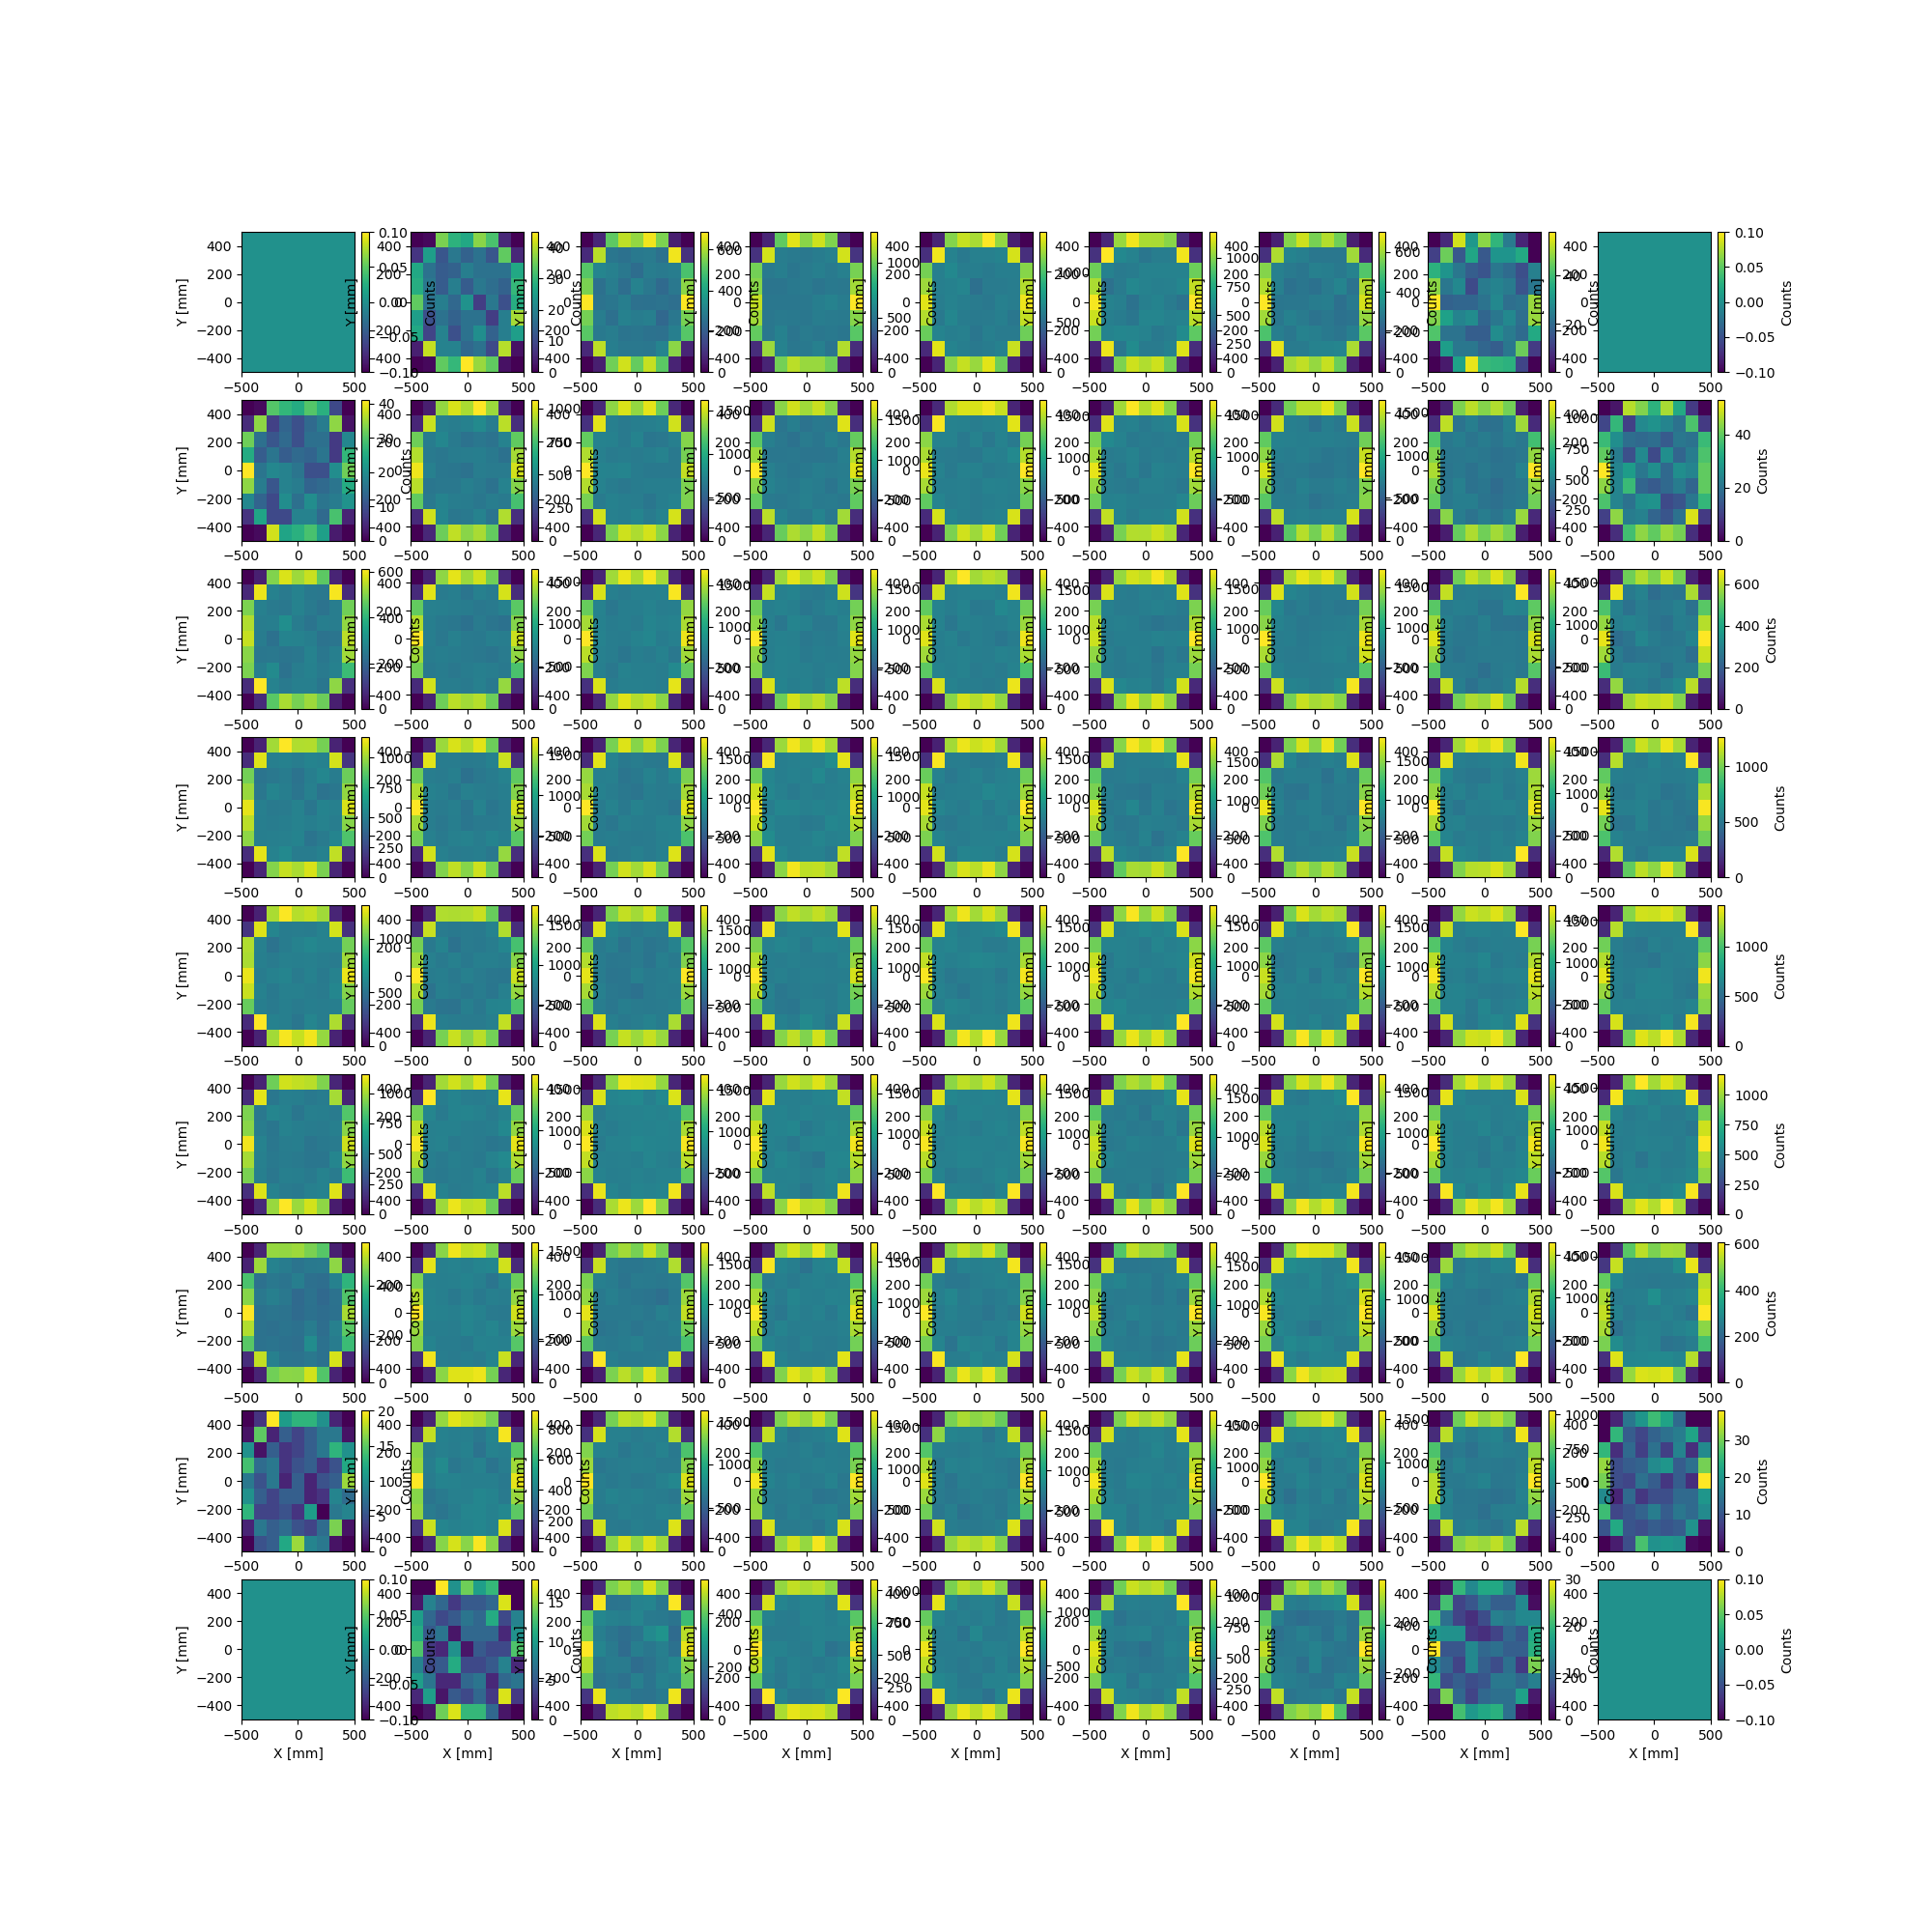

In [42]:
nbins=10

# Create a grid of subplots (5x5)
fig, axs = plt.subplots(nbins-1, nbins-1, figsize=(20, 20))  # Adjusted figsize for better spacing
axs = axs.flatten()  # Flatten the 2D array of subplots into a 1D array for easier indexing

# Iterate over the unique bin_id values and corresponding subplot axes
counter = 0
for y in range(nbins-2, -1, -1):
    for x in range(0, nbins-1, 1):
        if counter >= len(axs):
            break  # Avoid indexing beyond available subplots
        

        df_bin = cathode_events[cathode_events.bin_id == f"{x}_{y}"]

        if (counter == 1):
            print(cathode_events["bin_id"].dtype)
            display(df_bin)

    
        # Plotting the fitted exponential decay curve
        hist, xedges, yedges = np.histogram2d(df_bin.x, df_bin.y, bins = [np.linspace(-500,500, 10), np.linspace(-500,500, 10)])

        # 2. Mask zero bins
        # masked_hist = np.ma.masked_where(hist == 0, hist)  # Mask bins where the count is zero

        # 3. Create a custom colormap with white for the masked values (zero bins)
        cmap = plt.cm.viridis  # Choose a colormap you like
        cmap.set_bad(color='white')  # Set masked values (zeros) to white

        # 4. Plot the 2D histogram

        pcm = axs[counter].pcolormesh(xedges, yedges, hist.T, cmap=cmap)

        # Add color bar
        plt.colorbar(pcm, ax=axs[counter], label='Counts')

        axs[counter].set_xlabel("X [mm]")
        axs[counter].set_ylabel("Y [mm]")

        counter=counter+1

0 0_8
1509 1_8
26689 2_8
50847 3_8
57376 4_8
51076 5_8
27861 6_8
2022 7_8
0 8_8
1337 0_7
42629 1_7
66178 2_7
69271 3_7
70191 4_7
69190 5_7
65912 6_7
44090 7_7
1981 8_7
24580 0_6
65825 1_6
70848 2_6
71829 3_6
72670 4_6
72031 5_6
70929 6_6
66102 7_6
26918 8_6
47851 0_5
69130 1_5
71947 2_5
73175 3_5
73954 4_5
73706 5_5
72275 6_5
69077 7_5
50665 8_5
54528 0_4
69674 1_4
72926 2_4
73394 3_4
74005 4_4
73384 5_4
72698 6_4
70003 7_4
58090 8_4
46844 0_3
69290 1_3
72006 2_3
72919 3_3
73262 4_3
73524 5_3
71467 6_3
69467 7_3
49352 8_3
22029 0_2
65901 1_2
70476 2_2
72031 3_2
72999 4_2
72172 5_2
70895 6_2
66300 7_2
25101 8_2
530 0_1
37947 1_1
65885 2_1
68853 3_1
70279 4_1
69224 5_1
65856 6_1
40937 7_1
1051 8_1
0 0_0
496 1_0
21368 2_0
45256 3_0
53641 4_0
46138 5_0
23263 6_0
870 7_0
0 8_0


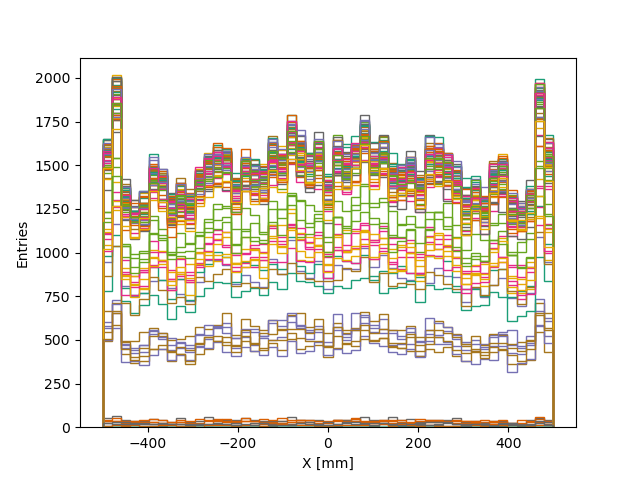

In [65]:
nbins=10

# Create a grid of subplots (5x5)
plt.figure()

# Iterate over the unique bin_id values and corresponding subplot axes
counter = 0
for y in range(nbins-2, -1, -1):
    for x in range(0, nbins-1, 1):
        
        df_bin = cathode_events[cathode_events.bin_id == f"{x}_{y}"]
        print(len(df_bin),  f"{x}_{y}")
        # Plotting the fitted exponential decay curve
        plt.hist(df_bin.x, bins = np.linspace(-500,500, 50), histtype="step")
        plt.xlabel("X [mm]")
        plt.ylabel("Entries")


,event_id,x,y,z,kin_energy,mode,prevol,postvol,initial_x,initial_y,x_bin,y_bin,x_bin_center,y_bin_center,bin_id
0,1000046,344.6420,208.34200,1187.43,2.99129,Absorption,MESH_HOLE_GAS,CATHODE_GRID,213.125000,-276.2500,6,2,222.222222,-222.222222,6_2
4,1000121,339.5530,-88.90620,1187.39,2.97770,Reflection,MESH_HOLE_GAS,CATHODE_GRID,48.156250,435.2500,4,8,0.000000,444.444444,4_8
6,1000161,-228.6830,185.63100,1187.38,2.98749,Reflection,MESH_HOLE_GAS,CATHODE_GRID,-2.505859,-420.7500,4,0,0.000000,-444.444444,4_0
8,1000208,108.4240,1.88369,1187.43,2.95855,Reflection,MESH_HOLE_GAS,CATHODE_GRID,-206.875000,-137.7500,2,3,-222.222222,-111.111111,2_3
15,1000375,42.4161,-347.32300,1187.46,2.66221,Reflection,MESH_HOLE_GAS,CATHODE_GRID,368.000000,77.0625,7,5,333.333333,111.111111,7_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4157962,99999071,199.2960,5.06500,1187.41,2.53287,Reflection,MESH_HOLE_GAS,CATHODE_GRID,151.000000,412.2500,5,8,111.111111,444.444444,5_8
4157976,99999429,-308.3450,-231.26800,1187.40,3.03480,Reflection,MESH_HOLE_GAS,CATHODE_GRID,71.125000,-185.8750,5,2,111.111111,-222.222222,5_2
4157980,99999450,197.3140,49.21760,1187.43,3.07942,Reflection,MESH_HOLE_GAS,CATHODE_GRID,115.375000,173.2500,5,6,111.111111,222.222222,5_6
4157986,99999619,126.6170,-380.77300,1187.40,2.76608,Absorption,MESH_HOLE_GAS,CATHODE_GRID,-113.812500,434.0000,3,8,-111.111111,444.444444,3_8


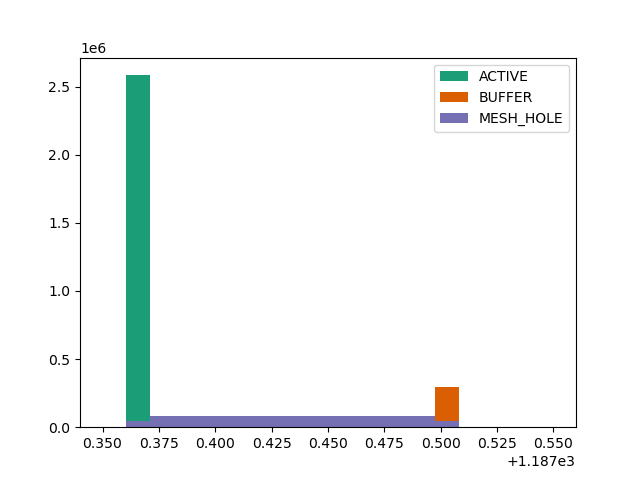

In [53]:
filt_active = cathode_events [cathode_events.prevol == "ACTIVE"]
filt_buffer = cathode_events [cathode_events.prevol == "BUFFER"]
filt_hole   = cathode_events [cathode_events.prevol == "MESH_HOLE_GAS"]

display(filt_hole)

plt.figure()
plt.hist(filt_active.z, bins = np.linspace(1187.35,1187.55,20), label = "ACTIVE");
plt.hist(filt_buffer.z, bins = np.linspace(1187.35,1187.55,20), label = "BUFFER");
plt.hist(filt_hole.z, bins = np.linspace(1187.35,1187.55,20), label = "MESH_HOLE");
plt.legend()

VISIBLE
Visible ACTIVE: ( 59.38 %)
Visible HOLE: ( 28.51 %)
Visible BUFFER: ( 7.71 %)

VUV
Visible ACTIVE: ( 83.58 %)
Visible HOLE: ( 10.58 %)
Visible BUFFER: ( 2.77 %)


Text(0, 0.5, 'entries')

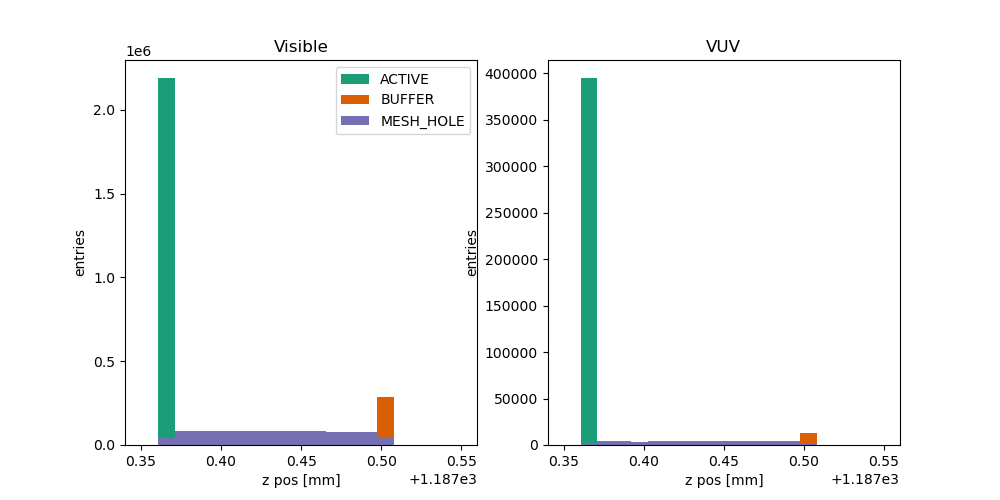

In [62]:
filt_active_vis = cathode_events [(cathode_events.prevol == "ACTIVE") & (cathode_events.kin_energy < 5)]
filt_buffer_vis = cathode_events [(cathode_events.prevol == "BUFFER") & (cathode_events.kin_energy < 5)]
filt_hole_vis   = cathode_events [(cathode_events.prevol == "MESH_HOLE_GAS") & (cathode_events.kin_energy < 5)]

print("VISIBLE")
print("Visible ACTIVE:", "(", round(100*len(filt_active_vis)/tot_vis,2), "%)")
print("Visible HOLE:",   "(", round(100*len(filt_hole_vis)/tot_vis,2), "%)")
print("Visible BUFFER:", "(", round(100*len(filt_buffer_vis)/tot_vis,2), "%)")


filt_active_vuv = cathode_events [(cathode_events.prevol == "ACTIVE") & (cathode_events.kin_energy > 5)]
filt_buffer_vuv = cathode_events [(cathode_events.prevol == "BUFFER") & (cathode_events.kin_energy > 5)]
filt_hole_vuv   = cathode_events [(cathode_events.prevol == "MESH_HOLE_GAS") & (cathode_events.kin_energy > 5)]

print("\nVUV")
print("Visible ACTIVE:", "(", round(100*len(filt_active_vuv)/tot_vuv,2), "%)")
print("Visible HOLE:",   "(", round(100*len(filt_hole_vuv)/tot_vuv,2), "%)")
print("Visible BUFFER:", "(", round(100*len(filt_buffer_vuv)/tot_vuv,2), "%)")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(filt_active_vis.z, bins = np.linspace(1187.35,1187.55,20), label = "ACTIVE");
axs[0].hist(filt_buffer_vis.z, bins = np.linspace(1187.35,1187.55,20), label = "BUFFER");
axs[0].hist(filt_hole_vis.z, bins = np.linspace(1187.35,1187.55,20), label = "MESH_HOLE");
axs[0].legend()
axs[0].set_title("Visible");
axs[0].set_xlabel("z pos [mm]")
axs[0].set_ylabel("entries")

axs[1].hist(filt_active_vuv.z, bins = np.linspace(1187.35,1187.55,20), label = "ACTIVE");
axs[1].hist(filt_buffer_vuv.z, bins = np.linspace(1187.35,1187.55,20), label = "BUFFER");
axs[1].hist(filt_hole_vuv.z, bins = np.linspace(1187.35,1187.55,20), label = "MESH_HOLE");
axs[1].set_title("VUV");
axs[1].set_xlabel("z pos [mm]")
axs[1].set_ylabel("entries")

Text(0, 0.5, 'y [mm]')

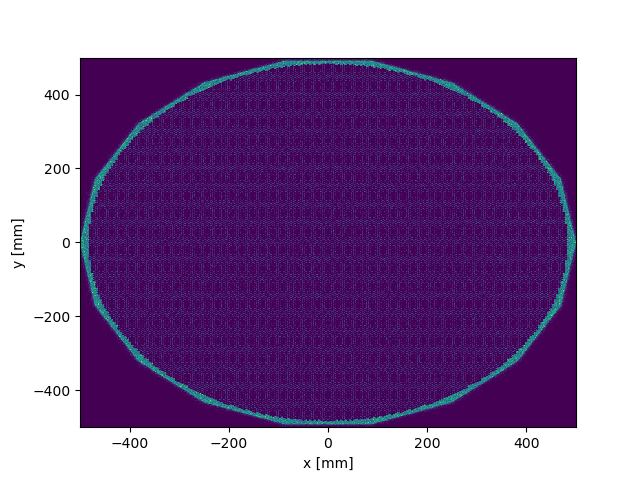

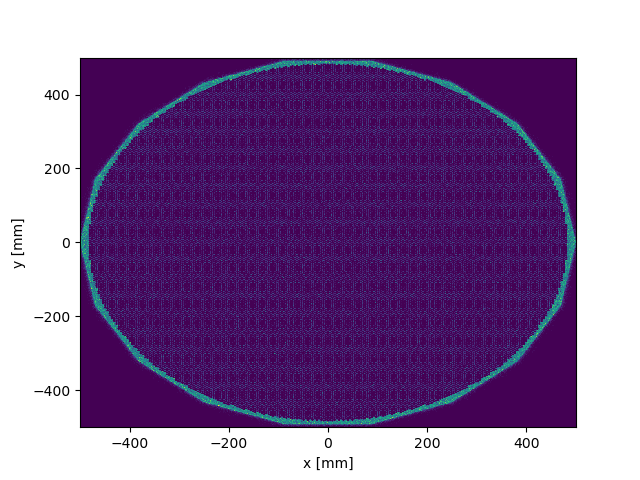

In [63]:
%matplotlib widget
# Plot the final x,y positions
plt.figure()
plt.hist2d(cathode_events[cathode_events["mode"] == "Absorption"].x, cathode_events[cathode_events["mode"] == "Absorption"].y, bins = [np.linspace(-500,500, 1000), np.linspace(-500,500, 1000)]);
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")


# The boader effect in the active is due to the mesh boarder exteding to the ring thickness. We are essentially seeing reflections on the ring. 


plt.figure()
plt.hist2d(cathode_events[cathode_events["mode"] == "Reflection"].x, cathode_events[cathode_events["mode"] == "Reflection"].y, bins = [np.linspace(-500,500, 1000), np.linspace(-500,500, 1000)]);
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")



In [60]:
Tot_absorbed_all  = len(cathode_events[cathode_events["mode"] == "Absorption"])
Tot_reflected_all = len(cathode_events[cathode_events["mode"] == "Reflection"])

Tot_emit = len(parts)

print("Fraction absorbed:", 100*Tot_absorbed_all / Tot_emit)
print("Fraction reflected:", 100*Tot_reflected_all / Tot_emit)



Tot_absorbed_all_active  = len(cathode_events[ (cathode_events["mode"] == "Absorption") & (cathode_events["prevol"] == "ACTIVE")])
Tot_reflected_all_active = len(cathode_events[ (cathode_events["mode"] == "Reflection") & (cathode_events["prevol"] == "ACTIVE")])

Tot_emit = len(parts)
print("--------------------------------------")
print("Fraction absorbed active:", 100*Tot_absorbed_all_active / Tot_emit)
print("Fraction reflected active:", 100*Tot_reflected_all_active / Tot_emit)


print("--------------------------------------")
Tot_absorbed_all_vuv  = len(cathode_events[ (cathode_events["mode"] == "Absorption") & (cathode_events.kin_energy > 5)])
Tot_reflected_all_vuv = len(cathode_events[ (cathode_events["mode"] == "Reflection") & (cathode_events.kin_energy > 5)])

print("Fraction absorbed vuv:", 100*Tot_absorbed_all_vuv / Tot_emit)
print("Fraction reflected vuv:", 100*Tot_reflected_all_vuv / Tot_emit)



Tot_absorbed_all_active_vuv  = len(cathode_events[ (cathode_events["mode"] == "Absorption") & (cathode_events.kin_energy > 5) & (cathode_events["prevol"] == "ACTIVE") ])
Tot_reflected_all_active_vuv = len(cathode_events[ (cathode_events["mode"] == "Reflection") & (cathode_events.kin_energy > 5) & (cathode_events["prevol"] == "ACTIVE") ])

print("--------------------------------------")
print("Fraction absorbed active vuv:", 100*Tot_absorbed_all_active_vuv / Tot_emit)
print("Fraction reflected active vuv:", 100*Tot_reflected_all_active_vuv / Tot_emit)



Fraction absorbed: 1.9877655892470434
Fraction reflected: 2.1722530213746416
--------------------------------------
Fraction absorbed active: 1.2718905616686744
Fraction reflected active: 1.3128524183383137
--------------------------------------
Fraction absorbed vuv: 0.3773839406390642
Fraction reflected vuv: 0.09482596783616826
--------------------------------------
Fraction absorbed active vuv: 0.3155649732764455
Fraction reflected active vuv: 0.07914836796285367
